# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')


sys.path.append(NOMEROFF_NET_DIR)

from nomeroff_net.TextDetectors.base import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("EuUaFrom2004")
PATH_TO_DATASET = info["dataset_path"]

In [5]:
DATASET_NAME = "eu_2004_2015"
VERSION = "2021_08_25_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [6]:
RESULT_MODEL_PATH

'/var/www/nomeroff-net24/models/anpr_ocr_eu_2004_2015_2021_08_25_pytorch_lightning.ckpt'

In [7]:
class eu_ua_2004_2015(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M",
                        "O", "P", "T", "X", "Z"]

        
        self.epochs = 50
        self.batch_size = 256
        self.gpus = 1

In [8]:
ocrTextDetector = eu_ua_2004_2015()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=6)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'P', 'K', '8', 'I', '2', '1', 'O', 'H', '0', 'E', 'C', '3', '4', 'X', 'B', 'Z', '5', '7', 'A', '6', 'T', '9', 'M'}
Letters val  {'P', 'K', '8', 'I', '2', '1', 'O', 'H', '0', 'E', 'C', '3', '4', 'X', 'B', 'Z', '5', '7', 'A', '6', 'T', '9', 'M'}
Letters test  {'P', 'K', '8', 'I', '2', '1', 'O', 'H', '0', 'E', 'C', '3', '4', 'X', 'B', 'Z', '5', '7', 'A', '6', 'T', '9', 'M'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.6 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.226    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.12589254117941648



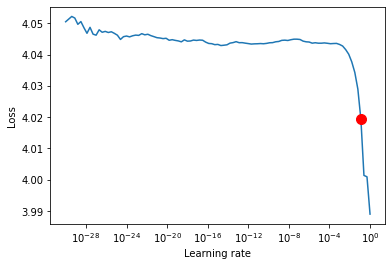

In [9]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [10]:
model = ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=23-step=9815.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.013805389404296875}
--------------------------------------------------------------------------------


In [13]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_2004_2015_2021_08_25_pytorch_lightning.ckpt


In [16]:
ocrTextDetector.load('/var/www/nomeroff-net24/models/anpr_ocr_eu_2004_2015_2021_08_25_pytorch_lightning.ckpt')

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [17]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/AA5557MI.png
Predicted: aa5557m 			 True: aa5557mm

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/AA6935TH.png
Predicted: aa6935ti 			 True: aa6935tx

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/AC7026BO.png
Predicted: ao7026bo 			 True: ac7026bo

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/BC4477AK.png
Predicted: bc441ax 			 True: bc4411ax

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/AC2846AP.png
Predicted: ac2846ap 			 True: ac2046ap

[INFO] /var/www/nomeroff-net24/

0.9917061611374408

## than train with augumentation

In [8]:
class eu_ua_2004_2015(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M",
                        "O", "P", "T", "X", "Z"]
        
        self.epochs = 25
        self.batch_size = 256
        self.gpus = 1

In [9]:
ocrTextDetector = eu_ua_2004_2015()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=6)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'I', 'C', '4', 'B', 'Z', 'X', '3', '8', '2', 'A', 'P', 'E', 'M', 'H', 'O', 'T', '1', '5', '7', '9', '0', '6', 'K'}
Letters val  {'I', 'C', '4', 'B', 'Z', 'X', '3', '8', '2', 'A', 'P', 'E', 'H', 'M', 'O', 'T', '1', '5', '7', '9', '0', '6', 'K'}
Letters test  {'I', 'C', '4', 'B', 'Z', 'X', '3', '8', '2', 'A', 'P', 'E', 'H', 'M', 'O', 'T', '1', '5', '7', '9', '0', '6', 'K'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [11]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.6 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.226    Total estimated model params size (MB)
Global seed set to 42


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.12589254117941648


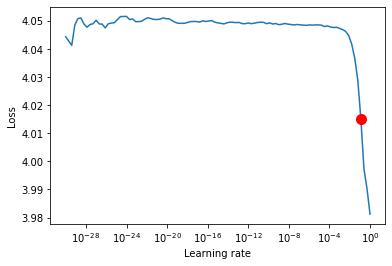

In [14]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [15]:
model = ocrTextDetector.train(seed=1)

Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=24-step=10224-v2.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.010813990607857704}
--------------------------------------------------------------------------------


In [16]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/AA6935TH.png
Predicted: aa6935tm 			 True: aa6935tx

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/AC7026BO.png
Predicted: ao7026bo 			 True: ac7026bo

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/KA1993AB.png
Predicted: ka993ab 			 True: ka1993ab

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/BH2800EE.png
Predicted: bh280ee 			 True: bh2800ee

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25/test/img/BC4477AK.png
Predicted: bc4417ax 			 True: bc4411ax

[INFO] /var/www/nomeroff-net24/

0.9881516587677726

In [ ]:
# 0.014759304890265832 per one photo
